# World Bank Data Analysis
---

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium 
import mplleaflet
from pandas.io import wb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid", color_codes=True)

In [189]:
wb.search('Population, total')

id               name                        source  \
9568  SP.POP.TOTL  Population, total  World Development Indicators   

                                             sourceNote  \
9568  Total population is based on the de facto defi...   

                                     sourceOrganization  \
9568  b'(1) United Nations Population Division. Worl...   

                        topics  
9568  Health  ; Climate Change

In [293]:
names = list(wb.get_countries()['name'])
names[:5]

['Aruba', 'Afghanistan', 'Africa', 'Angola', 'Albania']

In [272]:
codes =list(wb.get_countries()['iso3c'])
codes[:5]

['ABW', 'AFG', 'AFR', 'AGO', 'ALB']

# Selected Indices from 1960-2010

+ GDP
+ Income Percentrage held by top 10%
+ Total Population

In [190]:
ind = ['NY.GDP.MKTP.KN','SI.DST.10TH.10', 'SP.POP.TOTL']
ind_name = ['gdp','income_10pc','pop']

In [191]:
dat = wb.download(indicator=ind, country='all', start=1960, end=2010).fillna(0)
dat.columns = ind_name
dat.tail(10)

gdp  income_10pc        pop
country  year                                      
Zimbabwe 1969  4.826097e+09          0.0  5036321.0
         1968  4.292602e+09          0.0  4874113.0
         1967  4.209666e+09          0.0  4718612.0
         1966  3.884638e+09          0.0  4568320.0
         1965  3.826358e+09          0.0  4422132.0
         1964  3.647256e+09          0.0  4279561.0
         1963  3.688053e+09          0.0  4140804.0
         1962  3.471293e+09          0.0  4006262.0
         1961  3.422203e+09          0.0  3876638.0
         1960  3.218892e+09          0.0  3752390.0

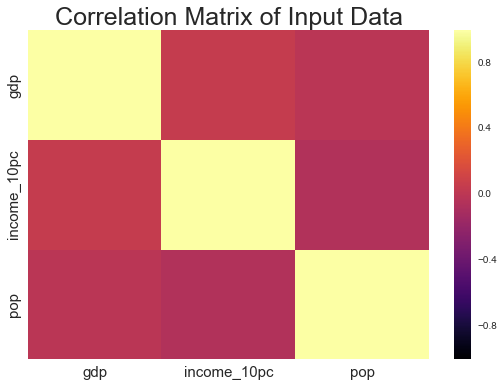

In [228]:
corr_raw = dat.corr()
sns.heatmap(corr_raw, cmap=plt.cm.inferno)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Matrix of Input Data',fontsize=25)

In [192]:
pct_chg_10 = dat.pct_change(periods=10).fillna(0)
pct_chg_10.head(10)

gdp  income_10pc  pop
country    year                       
Arab World 2010  0.0          0.0  0.0
           2009  0.0          0.0  0.0
           2008  0.0          0.0  0.0
           2007  0.0          0.0  0.0
           2006  0.0          0.0  0.0
           2005  0.0          0.0  0.0
           2004  0.0          0.0  0.0
           2003  0.0          0.0  0.0
           2002  0.0          0.0  0.0
           2001  0.0          0.0  0.0

# Exploratory Analysis

**Clean up aggregates**

In [193]:
dat_01 = dat.reset_index()

In [194]:
country_name = dat_01['country'].unique()
country_name = country_name[34:]

In [195]:
todrop = dat_01['country'].isin(country_name)
dat_01 = dat_01[todrop]
dat_01.head()

country  year           gdp  income_10pc         pop
1734  Afghanistan  2010  3.688652e+11          0.0  27962207.0
1735  Afghanistan  2009  3.401770e+11          0.0  27207291.0
1736  Afghanistan  2008  2.810901e+11          0.0  26528741.0
1737  Afghanistan  2007  2.712927e+11          0.0  25877544.0
1738  Afghanistan  2006  2.385196e+11          0.0  25183615.0

In [207]:
dat_01['inc_gdp'] = dat_01['income_10pc']/dat_01['gdp']
dat_01['gdp_pop'] = dat_01['gdp']/dat_01['pop']
dat_01['inc_gdppop']=dat_01['income_10pc']/dat_01['gdp_pop']
dat_01.replace(to_replace=[np.inf,np.nan,-np.inf,np.NaN, np.NAN,np.NINF],value=0, inplace=True)

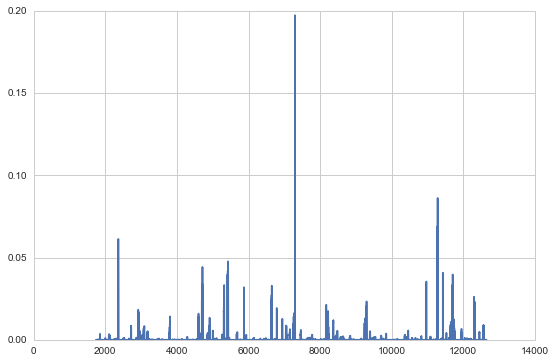

In [208]:
plt.plot(dat_01['inc_gdppop'])

In [198]:
dat_01.head()

country  year           gdp  income_10pc         pop  inc_gdp  \
1734  Afghanistan  2010  3.688652e+11          0.0  27962207.0      0.0   
1735  Afghanistan  2009  3.401770e+11          0.0  27207291.0      0.0   
1736  Afghanistan  2008  2.810901e+11          0.0  26528741.0      0.0   
1737  Afghanistan  2007  2.712927e+11          0.0  25877544.0      0.0   
1738  Afghanistan  2006  2.385196e+11          0.0  25183615.0      0.0   

           gdp_pop  inc_gdppop  
1734  13191.561210         0.0  
1735  12503.157580         0.0  
1736  10595.681374         0.0  
1737  10483.711584         0.0  
1738   9471.222567         0.0

In [199]:
df_index = dat_01.set_index('country')

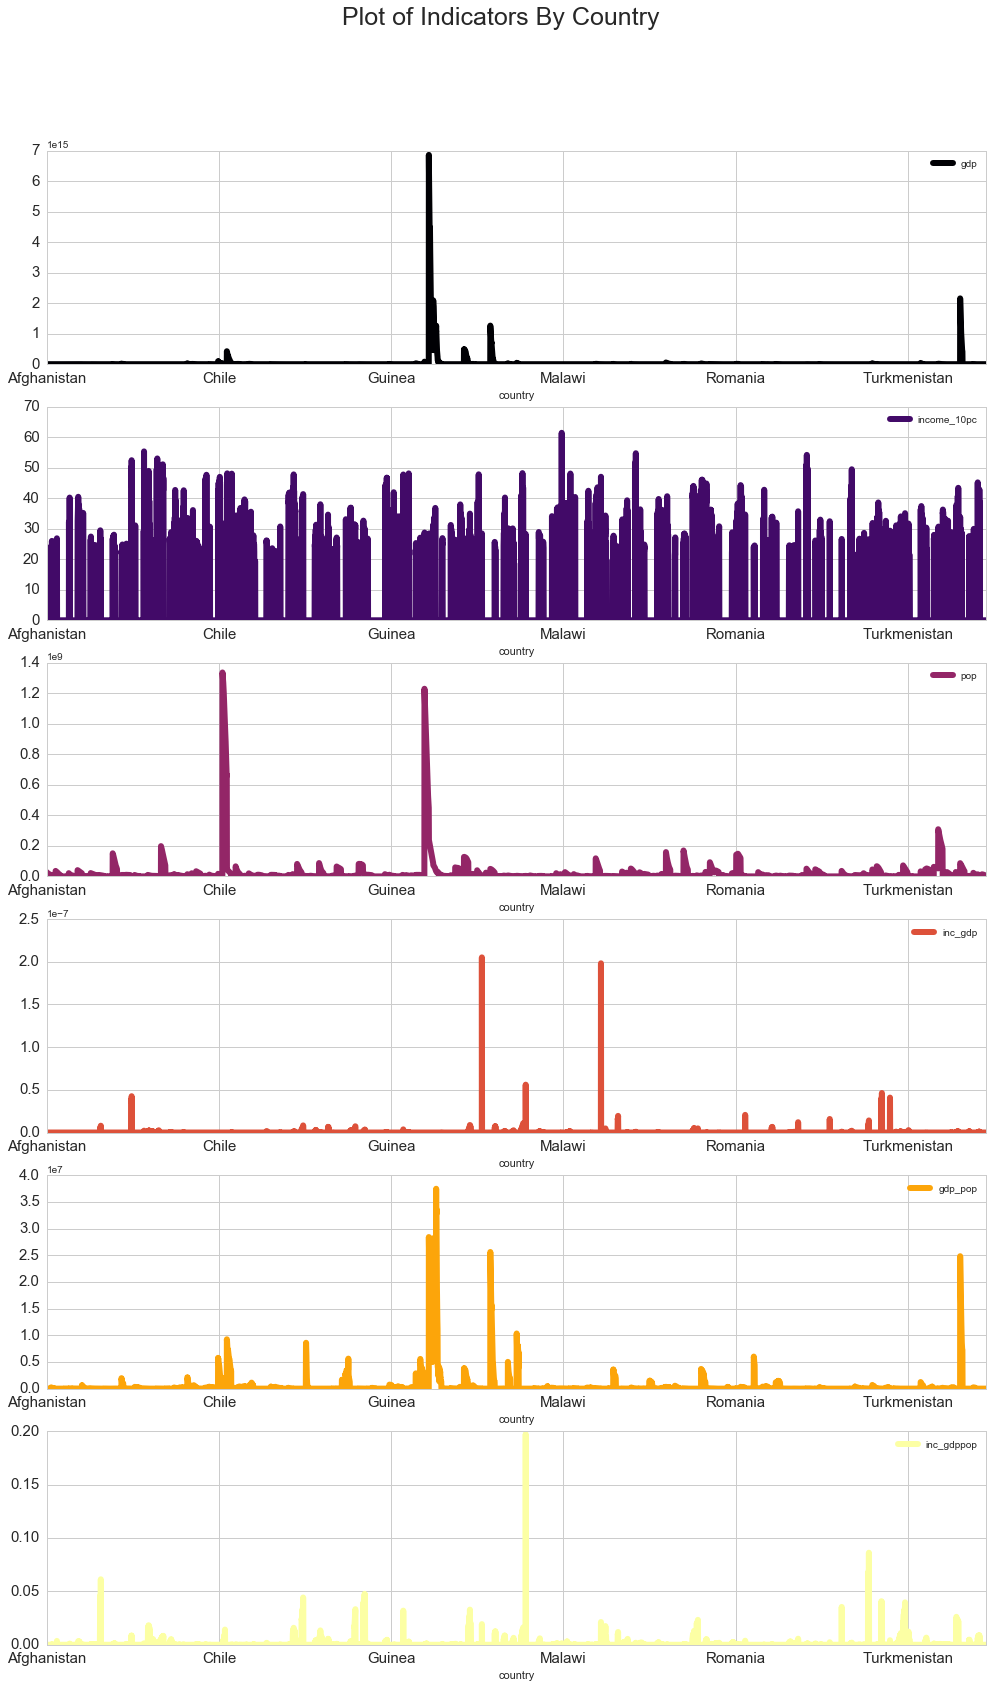

In [238]:
df_index.plot(subplots=True, sharex=False, colormap=plt.cm.inferno, kind='line',
           linewidth=6, fontsize=15, figsize=(15,25))
plt.suptitle("Plot of Indicators By Country", fontsize=25)

In [247]:
dat_01[dat_01.columns[2:]].pct_change(periods=50).dropna()

gdp  income_10pc         pop    inc_gdp    gdp_pop  inc_gdppop
1787     1.399069          inf   -0.886105        inf  20.063930         inf
1790     1.667143          inf   -0.871851        inf  19.812791         inf
1793          inf          inf   -0.851396        inf        inf         inf
1799          inf          inf   -0.811118        inf        inf         inf
1837    -0.447458    -1.000000   11.011543  -1.000000  -0.953999   -1.000000
1840    -0.380922    -1.000000   10.206865  -1.000000  -0.944759   -1.000000
1843    -0.348529    -1.000000    9.617758  -1.000000  -0.938643   -1.000000
1849    -0.342988    -1.000000    8.434156  -1.000000  -0.930358   -1.000000
1851    -0.228340          inf    8.011372        inf  -0.914368         inf
1901    -1.000000    -1.000000   -0.998134  -1.000000  -1.000000   -1.000000
1999   371.977598          inf  233.700800        inf   0.589162         inf
2049    -0.996042    -1.000000   -0.994756  -1.000000  -0.245215   -1.000000
2091   260.651105          inf  476.669467        inf  -0.452234         inf
2092   209.283618          inf  477.015712        inf  -0.560091         inf
2093   209.327937          inf  477.475064        inf  -0.560420         inf
2094   222.436326          inf  477.870727        inf  -0.533410         inf
2095   233.634111          inf  478.122510        inf  -0.510284         inf
2096   228.613333          inf  478.031437        inf  -0.520672         inf
2097   220.387366          inf  477.700410        inf  -0.537524         inf
2098   214.060366          inf  477.688929        inf  -0.550730         inf
2099   202.376782          inf  478.783252        inf  -0.576107         inf
2100   219.952020          inf  481.582101        inf  -0.542146         inf
2101   241.796416          inf  486.335161        inf  -0.501788         inf
2102   253.814004          inf  492.869148        inf  -0.484046         inf
2103   274.367834          inf  500.738537        inf  -0.451173         inf
2104   277.113984          inf  509.128337        inf  -0.454816         inf
2105   273.585859          inf  517.218013        inf  -0.470134         inf
2106   248.336832          inf  524.842494        inf  -0.525834         inf
2107   271.877872          inf  531.745175        inf  -0.487789         inf
2108   270.727693          inf  536.738626        inf  -0.494684         inf
...           ...          ...         ...        ...        ...         ...
12398   -1.000000    -1.000000   -0.998675  -1.000000  -1.000000   -1.000000
12400   -1.000000    -1.000000   -0.998641  -1.000000  -1.000000   -1.000000
12404   -1.000000    -1.000000   -0.998561  -1.000000  -1.000000   -1.000000
12410   -1.000000    -1.000000   -0.998443  -1.000000  -1.000000   -1.000000
12445         inf          inf   33.570767        inf        inf         inf
12447         inf          inf   31.446574        inf        inf         inf
12448         inf          inf   30.580190        inf        inf         inf
12449         inf          inf   29.758648        inf        inf         inf
12450         inf          inf   28.945191        inf        inf         inf
12495  254.762284    -1.000000    5.372389  -1.000000  39.136015   -1.000000
12497  261.682756    -1.000000    5.387960  -1.000000  40.121544   -1.000000
12498  247.064139    -1.000000    5.370809  -1.000000  37.937617   -1.000000
12499  228.145502    -1.000000    5.352849  -1.000000  35.069725   -1.000000
12500  245.637675     0.134266    5.335111  -0.995401  37.931863   -0.970865
12546   -0.982401          inf   -0.393687        inf  -0.970974         inf
12550   -0.985553     0.439146   -0.396153  98.617837  -0.976076   59.153921
12552   -0.986293          inf   -0.394775        inf  -0.977352         inf
12554   -0.987088          inf   -0.391467        inf  -0.978781         inf
12558   -0.986917          inf   -0.386267        inf  -0.978683         inf
12560   -0.986070          inf   -0.377554        inf  -0.977620         inf
12563   -0

## Group by country and mean 

In [201]:
grouped_mean = df_index.groupby(level=0).mean().fillna(0).reset_index()
grouped_mean.head()

country           gdp  income_10pc           pop       inc_gdp  \
0     Afghanistan  4.540726e+10     0.000000  1.503356e+07  0.000000e+00   
1         Albania  2.486434e+11     1.883529  2.677592e+06  3.931760e-12   
2         Algeria  1.859276e+11     0.527255  2.286301e+07  2.438190e-12   
3  American Samoa  0.000000e+00     0.000000  4.065896e+04  0.000000e+00   
4         Andorra  1.008578e+09     0.000000  4.694892e+04  0.000000e+00   

        gdp_pop  inc_gdppop  
0   1798.500809    0.000000  
1  82274.973855    0.000012  
2   7676.431382    0.000070  
3      0.000000    0.000000  
4  18619.986198    0.000000

In [202]:
print(grouped_mean['gdp'].max())
print(grouped_mean['gdp'].min())
print(grouped_mean['pop'].max())
print(grouped_mean['pop'].min())

2.5352886392e+15
0.0
1037823137.25
8377.17647059


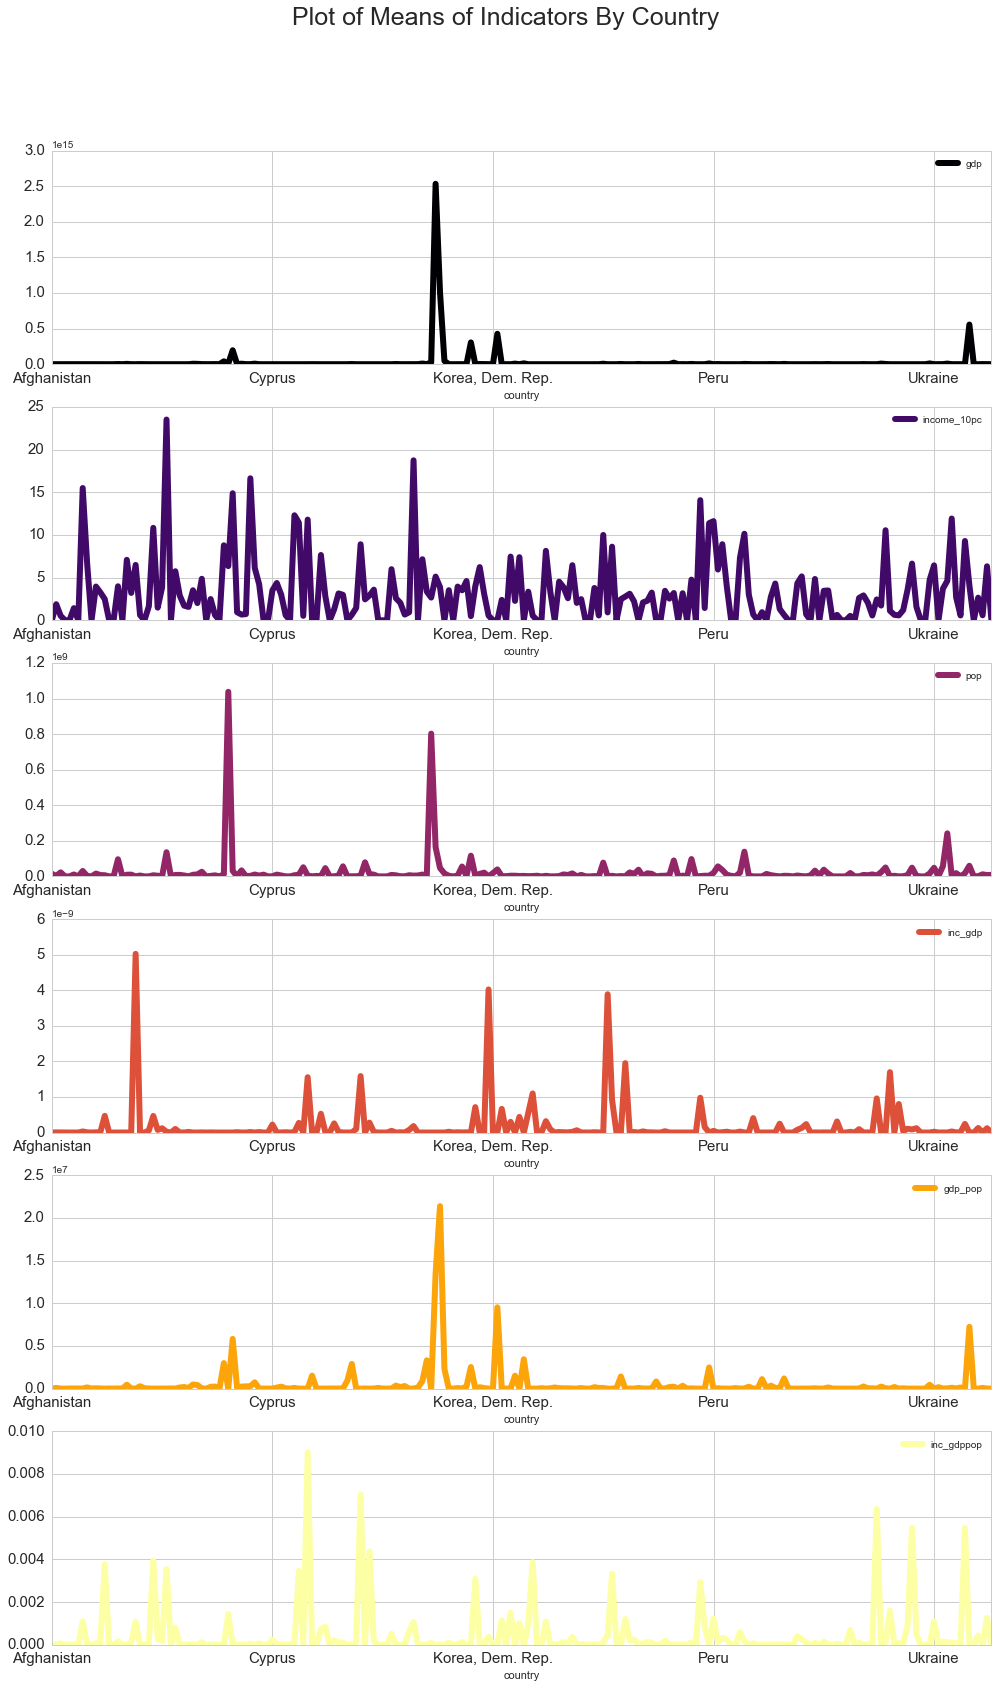

In [237]:
grouped_mean.plot(subplots=True, sharex=False,  x='country', colormap=plt.cm.inferno, kind='line',
           linewidth=6, fontsize=15, figsize=(15,25))
plt.suptitle("Plot of Means of Indicators By Country", fontsize=25)

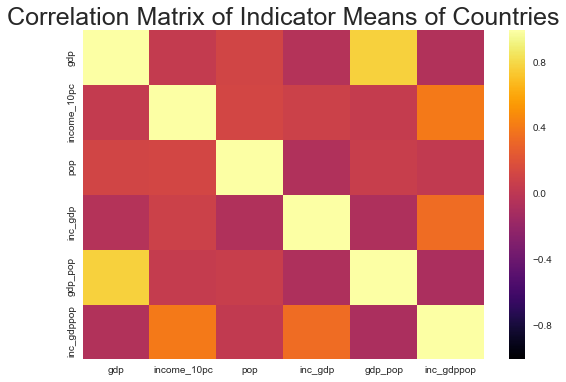

In [232]:
grouped_mean_corr = grouped_mean.corr()
sns.heatmap(grouped_mean_corr, cmap=plt.cm.inferno)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix of Indicator Means of Countries',fontsize=25)

## Group by Year and means

In [204]:
grouped_year = dat_01.groupby('year').mean().fillna(0).reset_index()

In [216]:
grouped_year.head(10)

year           gdp  income_10pc           pop  inc_gdp        gdp_pop  \
0  1960  4.330662e+12          0.0  1.410164e+07      0.0  158047.729305   
1  1961  4.649709e+12          0.0  1.429141e+07      0.0  165085.598967   
2  1962  4.861420e+12          0.0  1.453674e+07      0.0  170233.902659   
3  1963  4.980944e+12          0.0  1.483789e+07      0.0  173847.945685   
4  1964  5.281598e+12          0.0  1.514151e+07      0.0  180907.464912   
5  1965  5.633955e+12          0.0  1.545120e+07      0.0  200602.204661   
6  1966  6.028376e+12          0.0  1.577531e+07      0.0  211635.132109   
7  1967  6.382854e+12          0.0  1.609767e+07      0.0  219150.375566   
8  1968  7.220430e+12          0.0  1.642371e+07      0.0  241482.873004   
9  1969  8.016907e+12          0.0  1.676940e+07      0.0  259507.195730   

   inc_gdppop  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0

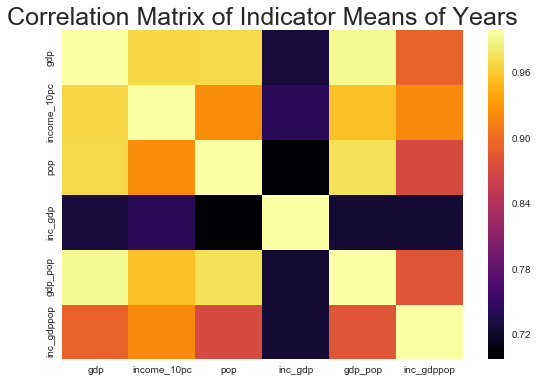

In [234]:
year_corr = grouped_year.corr()
sns.heatmap(year_corr, cmap=plt.cm.inferno)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix of Indicator Means of Years',fontsize=25)

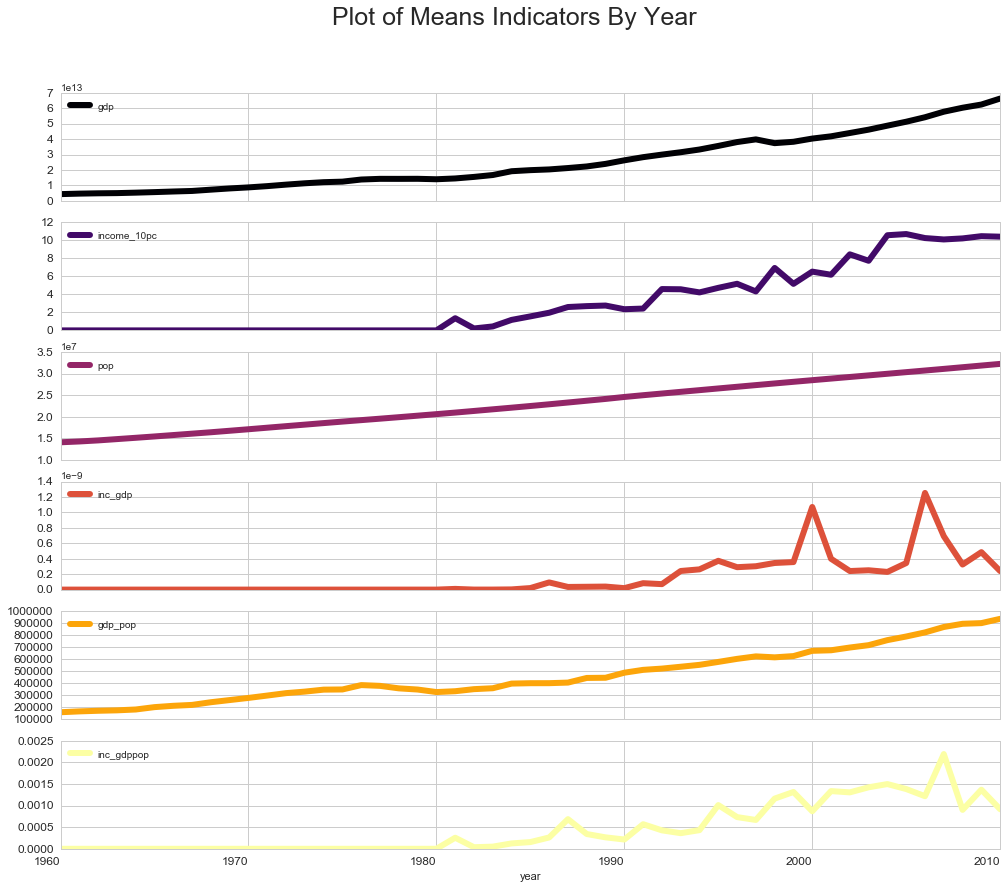

In [236]:
grouped_year.plot(subplots=True, sharex=True,  x='year', colormap=plt.cm.inferno, kind='line',
           linewidth=6, fontsize=12, figsize=(15,15), rot=0)
plt.suptitle("Plot of Means Indicators By Year", fontsize=25)


## Write out data

In [248]:
dat_01.to_excel('country_data_with_attr.xlsx')
grouped_mean.to_excel('grouped_country_mean.xlsx')
grouped_year.to_excel('grouped_year.xlsx')